In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [106]:
df = pd.read_csv("../data/Social_Network_Ads.csv", usecols=["Age","EstimatedSalary","Purchased"])

In [107]:
df['EstimatedSalary_k'] = (df['EstimatedSalary'] / 1000).astype(int)

In [108]:
df.head()

,Age,EstimatedSalary,Purchased,EstimatedSalary_k
0,19,19000,0,19
1,35,20000,0,20
2,26,43000,0,43
3,27,57000,0,57
4,19,76000,0,76


In [109]:
df.describe()

,Age,EstimatedSalary,Purchased,EstimatedSalary_k
count,400.000000,400.000000,400.000000,400.00000
mean,37.655000,69742.500000,0.357500,69.74250
std,10.482877,34096.960282,0.479864,34.09696
min,18.000000,15000.000000,0.000000,15.00000
25%,29.750000,43000.000000,0.000000,43.00000
50%,37.000000,70000.000000,0.000000,70.00000
75%,46.000000,88000.000000,1.000000,88.00000
max,60.000000,150000.000000,1.000000,150.00000


In [110]:
from collections import Counter
print(Counter(df["Purchased"]))

Counter({0: 257, 1: 143})


In [112]:
X = df[['Age', 'EstimatedSalary_k']]
y = df['Purchased']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

[-10.90617097]
[[0.19760279 0.03312442]]


In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred)
print(score, precision, recall, f1)

0.85 0.877742946708464 0.8160886039055668 0.775


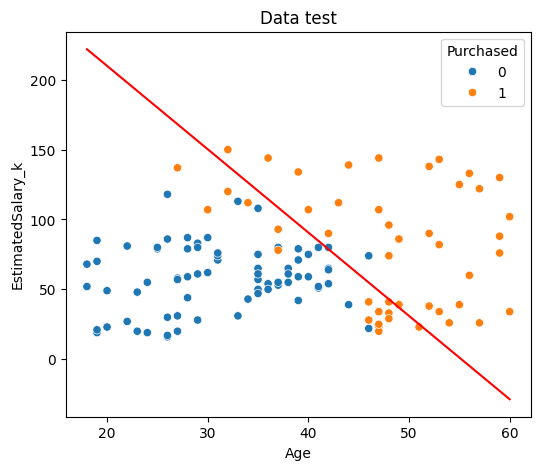

In [119]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_test.Age, y=X_test.EstimatedSalary_k, hue=y_test)
x0 = np.min(X_test.Age)
x1= np.max(X_test.Age)
y0 = -(model.intercept_ + model.coef_[0][0] * x0) / model.coef_[0][1]
y1 = -(model.intercept_ + model.coef_[0][0] * x1) / model.coef_[0][1]
plt.plot([x0,x1], [y0,y1], 'r')
plt.title("Data test")
plt.show()

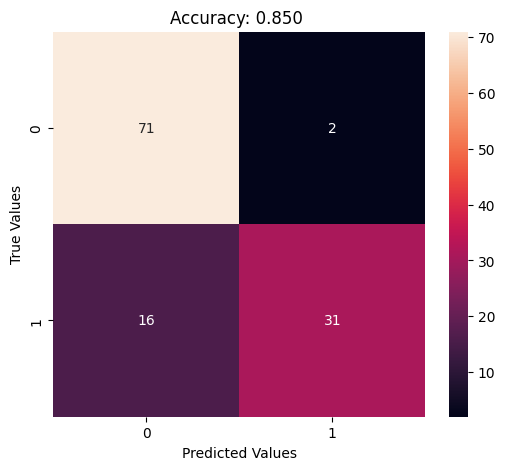

In [123]:
from sklearn .metrics import classification_report, confusion_matrix

cm= confusion_matrix(y_test, model.predict(X_test))
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Accuracy: {0:.3f} ".format(score))
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.show()

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [128]:
from sklearn.tree import DecisionTreeClassifier
ada_model = AdaBoostClassifier()

In [129]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [130]:
y_pred =  ada_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred)
print(score, precision, recall, f1)    

0.9083333333333333 0.91875 0.8905566890119498 0.8735632183908046


In [131]:
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid = {
    "n_estimators": [100,150,200],
    "learning_rate": [0.01, 0.1, 1.0],
    "algorithm": ["SAMME", "SAMME.R"]
}
model = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)


0.8785714285714287


In [132]:
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred)
print(score, precision, recall, f1)


0.8916666666666667 0.9146825396825397 0.8654911104634218 0.8433734939759037


In [133]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [134]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [135]:
y_pred = xgb_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred)
print(score, precision, recall, f1)

0.8916666666666667 0.8842857142857143 0.8920139900903526 0.865979381443299


In [136]:
param_grid = {
    "n_estimators": [50,100,200],
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3,5,7], 
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)

0.8928571428571429


In [137]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred)
print(score, precision, recall, f1)

0.925 0.9264354066985645 0.9156222675604779 0.9010989010989011
